In [12]:
# Load needed packages 
import os # Interoperable file paths
import pathlib  # Work with file and directory paths
from math import floor, ceil

import geopandas as gpd # Work with geospatial data
import rasterio as rio  # Read, write, and manipulate raster datasets
import rasterio.mask # Selectively extract portions of a raster dataset 
import rioxarray as rxr

In [13]:
# Retrieve location data
%store -r

In [14]:
# Define and create the project data directories
data_dir = os.path.join(
    pathlib.Path.home(),
    'GitHub',
    'habitat_project',
)
os.makedirs(data_dir, exist_ok=True)

In [15]:
# Access Polaris soil Data for Cherokee County OK
ok_soil_url_template =(
    "http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0"
    "/sand"
    "/mean"
    "/5_15/"
    "/lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif"
)

ok_soil_url = ok_soil_url_template.format(
    min_lat=35, max_lat=37, min_lon=-95, max_lon=-94
)
ok_soil_url

'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/sand/mean/5_15//lat3537_lon-95-94.tif'

In [16]:
# Use location geodataframe to define area of Cherokee County OK
bounds_min_lon, bounds_min_lat, bounds_max_lon, bounds_max_lat = (
    cherokee_county.total_bounds)

ok_soil_url_list = []
for min_lon in range(floor(bounds_min_lon), ceil(bounds_max_lon)):
    for min_lat in range(floor(bounds_min_lat), ceil(bounds_max_lat)):
        ok_soil_url = ok_soil_url_template.format(
            min_lat=min_lat, max_lat=min_lat+1,
            min_lon=min_lon, max_lon=min_lon+1)
        ok_soil_url_list.append(ok_soil_url)

ok_soil_url_list

['http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/sand/mean/5_15//lat3536_lon-96-95.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/sand/mean/5_15//lat3637_lon-96-95.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/sand/mean/5_15//lat3536_lon-95-94.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/sand/mean/5_15//lat3637_lon-95-94.tif']

In [17]:
# Open soil sand raster file and remove single-dimensional entries from the dataset.
ok_soil_da = rxr.open_rasterio(
    ok_soil_url,
    mask_and_scale=True
).squeeze()
ok_soil_da

<xarray.DataArray (y: 3600, x: 3600)> Size: 52MB
[12960000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 29kB -95.0 -95.0 -95.0 -95.0 ... -94.0 -94.0 -94.0
  * y            (y) float64 29kB 37.0 37.0 37.0 37.0 ... 36.0 36.0 36.0 36.0
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area

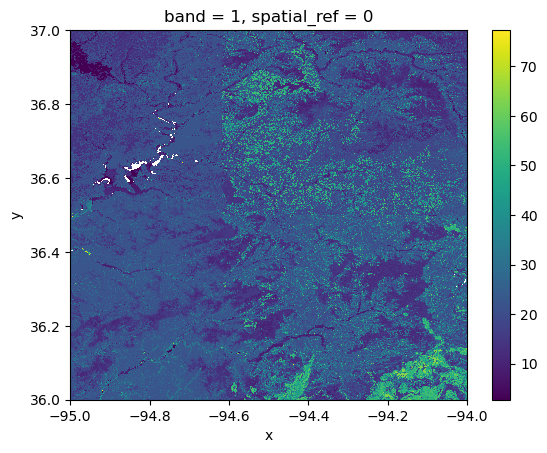

In [18]:
# Show data on sandy soil in Cherokee County OK
ok_soil_da.plot()

In [19]:
# Access Polaris soil Data for Jackson County NC
nc_soil_url_template =(
    "http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0"
    "/sand"
    "/mean"
    "/5_15/"
    "/lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif"
)

nc_soil_url = nc_soil_url_template.format(
    min_lat=35, max_lat=36, min_lon=-82, max_lon=-84
)
nc_soil_url

'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/sand/mean/5_15//lat3536_lon-82-84.tif'

In [20]:
# Use location geodataframe to define area of Jackson County NC
bounds_min_lon, bounds_min_lat, bounds_max_lon, bounds_max_lat = (
    jackson_county.total_bounds)

nc_soil_url_list = []
for min_lon in range(floor(bounds_min_lon), ceil(bounds_max_lon)):
    for min_lat in range(floor(bounds_min_lat), ceil(bounds_max_lat)):
        nc_soil_url = nc_soil_url_template.format(
            min_lat=min_lat, max_lat=min_lat+1,
            min_lon=min_lon, max_lon=min_lon+1)
        nc_soil_url_list.append(ok_soil_url)

nc_soil_url_list

['http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/sand/mean/5_15//lat3637_lon-95-94.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/sand/mean/5_15//lat3637_lon-95-94.tif']

In [21]:
# Open soil sand raster file and remove single-dimensional entries from the dataset.
nc_soil_da = rxr.open_rasterio(
    nc_soil_url,
    mask_and_scale=True
).squeeze()
nc_soil_da

<xarray.DataArray (y: 3600, x: 3600)> Size: 52MB
[12960000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 29kB -83.0 -83.0 -83.0 -83.0 ... -82.0 -82.0 -82.0
  * y            (y) float64 29kB 36.0 36.0 36.0 36.0 ... 35.0 35.0 35.0 35.0
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area

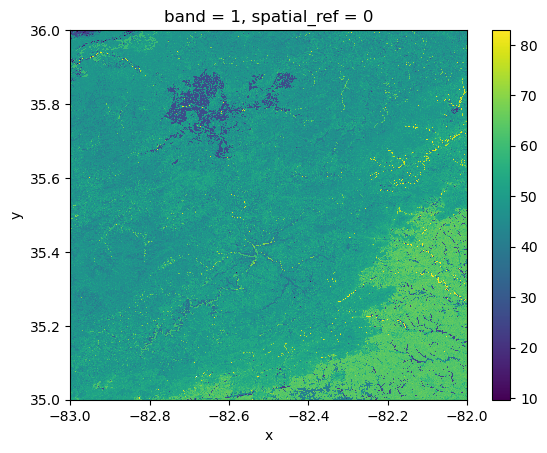

In [22]:
# Show soil sand data in Jackson County NC
nc_soil_da.plot()